In [1]:
import matplotlib.pyplot as plt
import time
from gengraph import EpsimGraph
from epsim import Epsim

In [2]:
# Testrun

starttime = time.time()
epsim_graph = EpsimGraph(k=100000, sigma_office=0.5, perc_split_classes=0.5)
sim = Epsim()
sim.init_from_dicts(epsim_graph.family_nbrs, epsim_graph.school_nbrs_standard, epsim_graph.school_nbrs_split, epsim_graph.office_nbrs)
sim.run_sim(sim_iters=200, p_spread_family=0.3, p_spread_school_office=0.2, p_detect_child=0.2, p_detect_parent=0.0,
            p_testing=0.5, print_progress=True, export_csv=False)
print('runtime: {}s'.format(time.time() - starttime))

creating graph with k=100000, sigma_office=0.5
randomly cluster children and parent nodes, such that there are child-parent pairs
parents: 1/2 no change, 1/4 merge 2 nodes, 1/8 merge 3 nodes, ...
parents: duplicate every node
children: k/l^2 many l*l grids, place l^2 nodes randomly on grid, cluster 8 neighbourhood, with l=5
	50000 children in split classes and 50000 children in standard classes (100000 total, break: 2000)
parents: cluster 1-sigma_office no change, sigma_office*1/2 cluster 2 nodes, sigma_office*1/4 cluster 3 nodes, sigma_office*1/8 cluster 4 nodes, sigma_office*1/8 cluster 5 nodes
starting simulation with n=238640, num_start_nodes=24, sim_iters=200
p_spread_family=0.3, p_spread_school_office=0.2, p_detect_child=0.2, p_detect_parent=0.0 p_testing=0.5
50000 children in split classes and 50000 children in standard classes
0:	[238616, 0, 24, 0, 0, 0]	[0, 0, 0, 0, 0]
1:	[238616, 0, 0, 24, 0, 0]	[0, 0, 0, 0, 0]
2:	[238578, 31, 0, 0, 23, 8]	[20, 8, 4, 5, 3]
3:	[238555, 18, 31,

In [10]:
# Run with various parameters

sim_iters = 500
k = 100000
sigma_office_vals = [0.5]
p_spread_family = 0.3
p_spread_school_office_vals = [0.2, 0.22, 0.24, 0.26]
p_detect_child_vals = [0.2]
p_detect_parent_vals = [0.0, 0.5]
p_testing_vals = [0.5]
perc_split_classes = 0.5

results = {}

starttime = time.time()
for sigma_office in sigma_office_vals:
    epsim_graph = EpsimGraph(k, sigma_office, perc_split_classes)
    sim = Epsim()
    sim.init_from_dicts(epsim_graph.family_nbrs, epsim_graph.school_nbrs_standard, epsim_graph.school_nbrs_split, epsim_graph.office_nbrs)
    for p_detect_child in p_detect_child_vals:
        for p_detect_parent in p_detect_parent_vals:
            for p_testing in p_testing_vals:
                for p_spread_school_office in p_spread_school_office_vals:
                    x_rounds, y_num_infected = sim.run_sim(
                        sim_iters, p_spread_family, p_spread_school_office, p_detect_child, p_detect_parent, p_testing)
                    # trick: use tuples as keys to avoid complicated multidimensional initialization
                    results[sigma_office, p_detect_child, p_detect_parent, p_testing, p_spread_school_office] = (x_rounds, y_num_infected)

print('runtime: {}s'.format(time.time() - starttime))

creating graph with k=100000, sigma_office=0.5
randomly cluster children and parent nodes, such that there are child-parent pairs
parents: 1/2 no change, 1/4 merge 2 nodes, 1/8 merge 3 nodes, ...
parents: duplicate every node
children: k/l^2 many l*l grids, place l^2 nodes randomly on grid, cluster 8 neighbourhood, with l=5
	50000 children in split classes and 50000 children in standard classes (100000 total, break: 2000)
parents: cluster 1-sigma_office no change, sigma_office*1/2 cluster 2 nodes, sigma_office*1/4 cluster 3 nodes, sigma_office*1/8 cluster 4 nodes, sigma_office*1/8 cluster 5 nodes
starting simulation with n=238640, num_start_nodes=24, sim_iters=500
p_spread_family=0.3, p_spread_school_office=0.2, p_detect_child=0.2, p_detect_parent=0.0 p_testing=0.5
50000 children in split classes and 50000 children in standard classes
infected nodes: 22353

starting simulation with n=238640, num_start_nodes=24, sim_iters=500
p_spread_family=0.3, p_spread_school_office=0.22, p_detect_ch

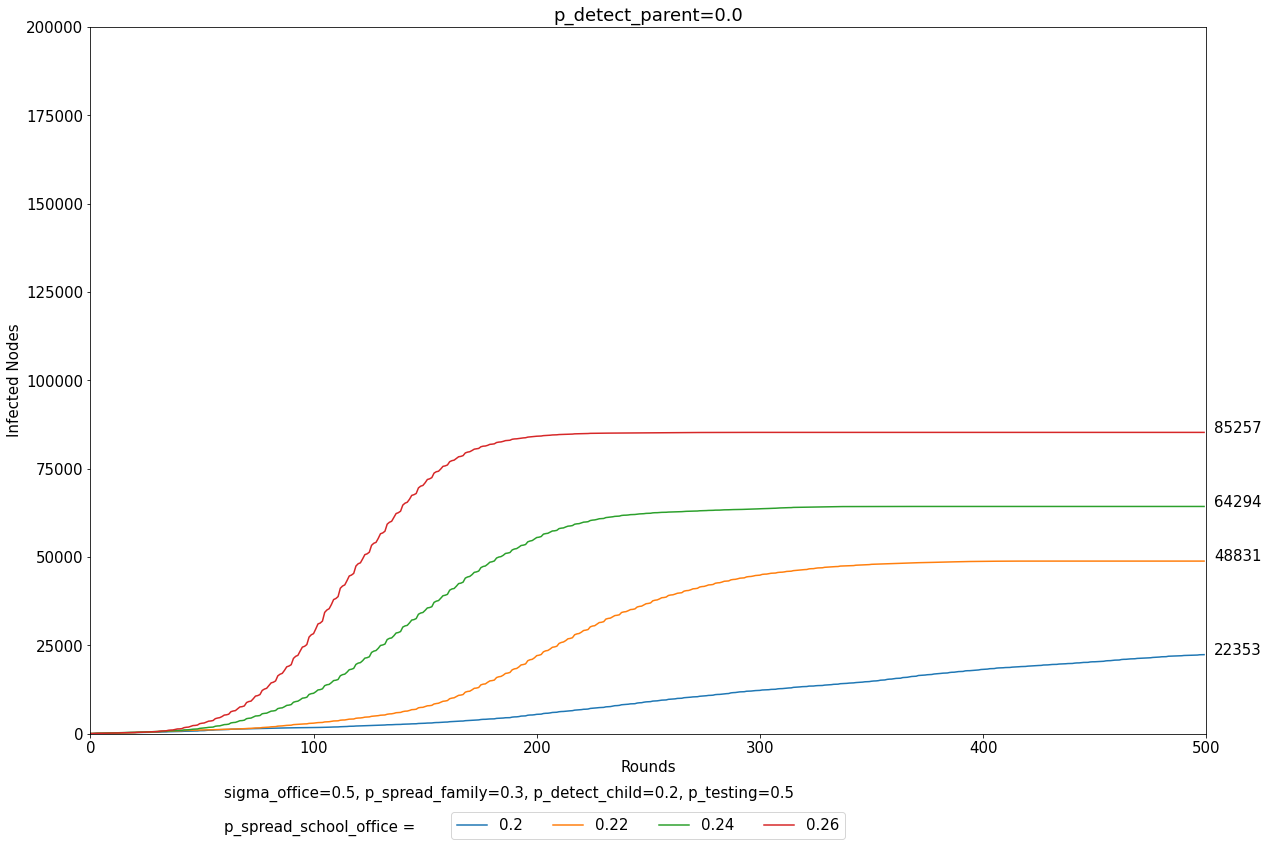

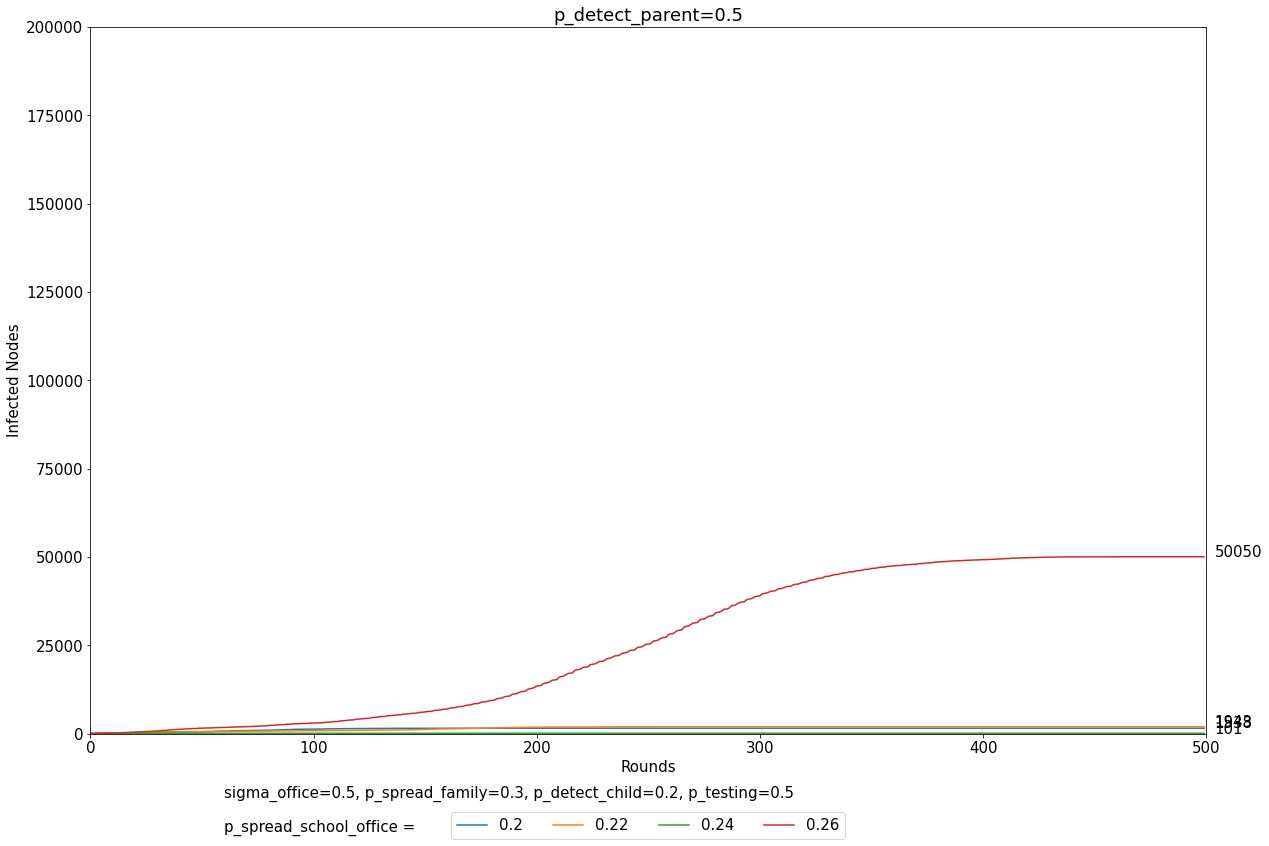

In [12]:
plt.rcParams.update({'font.size': 15})

for sigma_office in sigma_office_vals:
    for p_detect_child in p_detect_child_vals:
        for p_detect_parent in p_detect_parent_vals:
            for p_testing in p_testing_vals:
                fig, axs = plt.subplots(figsize=(20,13))
                fig.patch.set_facecolor('xkcd:white')
                axs.set_ylim(top=200000)
                axs.set_xlim(0, 500)
                for p_spread_school_office in p_spread_school_office_vals:
                    result = results[sigma_office, p_detect_child, p_detect_parent, p_testing, p_spread_school_office]
                    axs.plot(result[0], result[1], label=p_spread_school_office)
                    plt.annotate(max(result[1]), xy=(1, max(result[1])), xytext=(8, 0), xycoords=('axes fraction', 'data'), textcoords='offset points')
                axs.set_title('p_detect_parent={}'.format(p_detect_parent))
                axs.set_xlabel('Rounds')
                axs.set_ylabel('Infected Nodes')
                axs.text(0.12, -0.09, 'sigma_office={}, p_spread_family={}, p_detect_child={}, p_testing={}'.format(
                    sigma_office, p_spread_family, p_detect_child, p_testing), transform=axs.transAxes)
                axs.text(0.12, -0.138, 'p_spread_school_office =', transform=axs.transAxes)                   
                axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)